In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
a = pd.read_csv('../../Data/accepted.csv')
a.shape

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2260701, 151)

In [4]:
drop = a[a.funded_amnt.isnull()].index
a.drop(drop, axis=0, inplace=True)
a.shape

(2260668, 151)

In [5]:
a.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,246

In [6]:
a.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [7]:
a = a.assign(FICO = (a['fico_range_low'] + a['fico_range_high'])/2)

In [8]:
a['loan_status'].replace({'Current':np.nan, 
                          'Late (31-120 days)':np.nan,
                          'In Grace Period':np.nan,
                          'Late (16-30 days)':np.nan,
                          'Does not meet the credit policy. Status:Fully Paid':'Fully Paid',
                          'Does not meet the credit policy. Status:Charged Off':'Charged Off',
                          'Default':'Charged Off'}, inplace=True)

In [9]:
a['loan_status'].value_counts(dropna=False)

Fully Paid     1078739
NaN             912569
Charged Off     269360
Name: loan_status, dtype: int64

In [10]:
#No missing values for interest rate! 
a.int_rate.isna().sum()

0

In [11]:
#These type of "Sigmoid view" scatter plots don't often yield much.....

#sns.scatterplot(data=a, x='int_rate', y='loan_status');

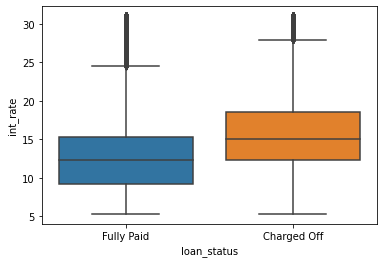

In [12]:
sns.boxplot(data=a, x='loan_status', y='int_rate');

In [13]:
#ax = sns.histplot(a.int_rate, bins=10, kde=True, color='purple')

In [14]:
a_sub = a[['dti', 'int_rate', 'FICO', 'loan_status']]
a_sub = a_sub.assign(ls_numeric = a['loan_status'].replace({'Fully Paid':1, 'Charged Off':0}))
a_sub.head(2)

,dti,int_rate,FICO,loan_status,ls_numeric
0,5.91,13.99,677.0,Fully Paid,1.0
1,16.06,11.99,717.0,Fully Paid,1.0


In [15]:
a_sub.shape

(2260668, 5)

In [16]:
a_sub.dtypes

dti            float64
int_rate       float64
FICO           float64
loan_status     object
ls_numeric     float64
dtype: object

In [17]:
a_sub.isna().sum()

dti              1711
int_rate            0
FICO                0
loan_status    912569
ls_numeric     912569
dtype: int64

In [18]:
a_sub = a_sub.dropna()
a_sub.isna().sum()

dti            0
int_rate       0
FICO           0
loan_status    0
ls_numeric     0
dtype: int64

In [19]:
a_sub.shape

(1347725, 5)

In [20]:
X = a_sub[['dti', 'int_rate', 'FICO']]
y = a_sub.ls_numeric

In [21]:
X

,dti,int_rate,FICO
0,5.91,13.99,677.0
1,16.06,11.99,717.0
2,10.78,10.78,697.0
4,25.37,22.45,697.0
5,10.20,13.44,692.0
...,...,...,...
2260688,20.59,9.49,737.0
2260690,22.03,13.99,707.0
2260691,10.34,14.49,737.0
2260692,12.25,12.79,667.0


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [23]:
X

,dti,int_rate,FICO
0,-1.108356,0.157159,-0.664359
1,-0.198490,-0.262538,0.591554
2,-0.671800,-0.516455,-0.036403
3,0.636077,1.932479,-0.036403
4,-0.723792,0.041742,-0.193392
...,...,...,...
1347720,0.207588,-0.787160,1.219510
1347721,0.336672,0.157159,0.277576
1347722,-0.711242,0.262083,1.219510
1347723,-0.540026,-0.094659,-0.978337


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [25]:
models = {
    LogisticRegression(): "Logistic Regression",
    #SVC(): "Support Vector Machine",
    MLPClassifier(): "Neural Network"
}

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123)

In [27]:
for model in models.keys():
    model.fit(X_train, y_train)

In [28]:
for model, name in models.items():
    print(name + ": {:.4f}".format(model.score(X_test, y_test)))

Logistic Regression: 0.7997
Neural Network: 0.8007


In [29]:
LR = LogisticRegression()

In [30]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=2)
sfs.fit(X,y)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=2)

In [31]:
sfs.get_support()

array([ True, False,  True])

In [32]:
sfs1 = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=1)
sfs1.fit(X,y)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=1)

In [33]:
sfs1.get_support()

array([False, False,  True])

In [34]:
from sklearn.metrics import f1_score

sfs1f1 = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=1, scoring='f1')
sfs1f1.fit(X,y)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=1, scoring='f1')

In [35]:
sfs1f1.get_support()

array([False, False,  True])

In [36]:
sfs2f1 = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=2, scoring='f1')
sfs2f1.fit(X,y)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=2, scoring='f1')

In [37]:
sfs2f1.get_support()

array([ True, False,  True])

In [38]:
from sklearn.metrics import recall_score

sfs1r = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=1, scoring='recall')
sfs1r.fit(X,y)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=1, scoring='recall')

In [39]:
sfs1r.get_support()

array([False, False,  True])